## MOVIE VOTES PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error 
from sklearn.preprocessing import LabelEncoder, RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn. tree import DecisionTreeRegressor
from sklearn. ensemble import GradientBoostingRegressor,RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('Movies with sequels.csv')

In [3]:
df.head()

,index,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,0,1,tt0145487,03-11-2011,03-11-2011,NaN,Spider-Man,https://www.imdb.com/title/tt0145487/,movie,7.3,121.0,2002.0,"Action, Adventure, Sci-Fi",670777.0,30-04-2002,Sam Raimi
1,1,2,tt0316654,03-11-2011,03-11-2011,NaN,Spider-Man 2,https://www.imdb.com/title/tt0316654/,movie,7.3,127.0,2004.0,"Action, Adventure, Sci-Fi",528482.0,25-06-2004,Sam Raimi
2,2,3,tt0413300,03-11-2011,03-11-2011,NaN,Spider-Man 3,https://www.imdb.com/title/tt0413300/,movie,6.2,139.0,2007.0,"Action, Adventure, Sci-Fi",485814.0,03-04-2007,Sam Raimi
3,3,4,tt0133093,03-11-2011,03-11-2011,NaN,The Matrix,https://www.imdb.com/title/tt0133093/,movie,8.7,136.0,1999.0,"Action, Sci-Fi",1615984.0,24-03-1999,"Lilly Wachowski, Lana Wachowski"
4,4,5,tt0234215,03-11-2011,03-11-2011,NaN,The Matrix Reloaded,https://www.imdb.com/title/tt0234215/,movie,7.2,138.0,2003.0,"Action, Sci-Fi",502256.0,07-05-2003,"Lilly Wachowski, Lana Wachowski"


In [4]:
df.tail()

,index,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
1069,1069,1110,tt1560220,02-02-2020,02-02-2020,NaN,Zombieland: Double Tap,https://www.imdb.com/title/tt1560220/,movie,6.7,99.0,2019.0,"Action, Comedy, Horror",113335.0,09-10-2019,Ruben Fleischer
1070,1070,1111,tt0081505,06-03-2020,06-03-2020,NaN,The Shining,https://www.imdb.com/title/tt0081505/,movie,8.4,146.0,1980.0,"Drama, Horror",857784.0,23-05-1980,Stanley Kubrick
1071,1071,1112,tt5606664,06-03-2020,06-03-2020,NaN,Doctor Sleep,https://www.imdb.com/title/tt5606664/,movie,7.4,152.0,2019.0,"Drama, Fantasy, Horror, Thriller",106753.0,30-10-2019,Mike Flanagan
1072,1072,1113,tt0276919,22-05-2020,22-05-2020,NaN,Dogville,https://www.imdb.com/title/tt0276919/,movie,8.0,178.0,2003.0,"Crime, Drama",133780.0,19-05-2003,Lars von Trier
1073,1073,1114,tt0342735,22-05-2020,22-05-2020,NaN,Manderlay,https://www.imdb.com/title/tt0342735/,movie,7.3,139.0,2005.0,Drama,21954.0,16-05-2005,Lars von Trier


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1074.0,536.500000,310.181399,0.0,268.25,536.5,804.75,1073.0
Position,1074.0,550.053073,324.483459,1.0,269.25,537.5,833.75,1114.0
Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMDb Rating,1053.0,6.233428,1.223566,1.4,5.50,6.4,7.10,9.2
Runtime (mins),1053.0,105.039886,19.299036,21.0,92.00,101.0,115.00,202.0
Year,1061.0,2002.143261,11.307045,1942.0,1996.00,2004.0,2010.00,2022.0
Num Votes,1053.0,178197.743590,242071.889760,392.0,26806.00,89717.0,225438.00,2220190.0


In [6]:
df.shape

(1074, 16)

### CHANGING COLUMN NAME

In [7]:
df=df.rename(columns={'Release Date':'Release_Date',
                      'Title Type':'Title_Type',
                      'IMDb Rating':'IMDb_Rating',
                      'Num Votes':'Num_Votes'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           1074 non-null   int64  
 1   Position        1074 non-null   int64  
 2   Const           1074 non-null   object 
 3   Created         1074 non-null   object 
 4   Modified        1074 non-null   object 
 5   Description     0 non-null      float64
 6   Title           1074 non-null   object 
 7   URL             1074 non-null   object 
 8   Title_Type      1074 non-null   object 
 9   IMDb_Rating     1053 non-null   float64
 10  Runtime (mins)  1053 non-null   float64
 11  Year            1061 non-null   float64
 12  Genres          1074 non-null   object 
 13  Num_Votes       1053 non-null   float64
 14  Release_Date    1060 non-null   object 
 15  Directors       1065 non-null   object 
dtypes: float64(5), int64(2), object(9)
memory usage: 134.4+ KB


### DROPING UNWANTED COLUMNS

In [9]:
col=['index','Const','Created','Modified','Description','URL','Release_Date']
df.drop(columns=col,inplace=True)

### DROPING NULL VALUES AND DUPLICATES

In [10]:
df.isnull().mean()*100

Position          0.000000
Title             0.000000
Title_Type        0.000000
IMDb_Rating       1.955307
Runtime (mins)    1.955307
Year              1.210428
Genres            0.000000
Num_Votes         1.955307
Directors         0.837989
dtype: float64

In [11]:
df.dropna(inplace=True)

In [12]:
df.duplicated().sum()

0

### CHANGING DATA TYPE

In [13]:
df['Year'] = df['Year'].astype(int, errors='raise')

# EXPLORATORY DATA ANALYSIS 

## UNIVARIATE ANALYSIS

### HISTPLOT

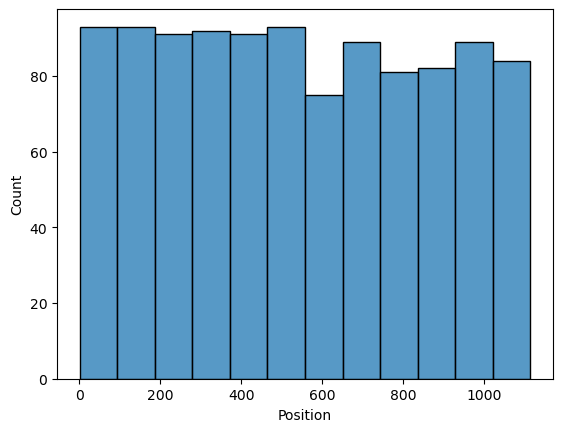

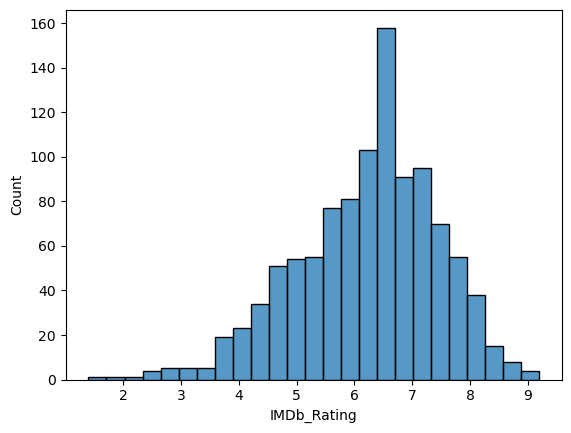

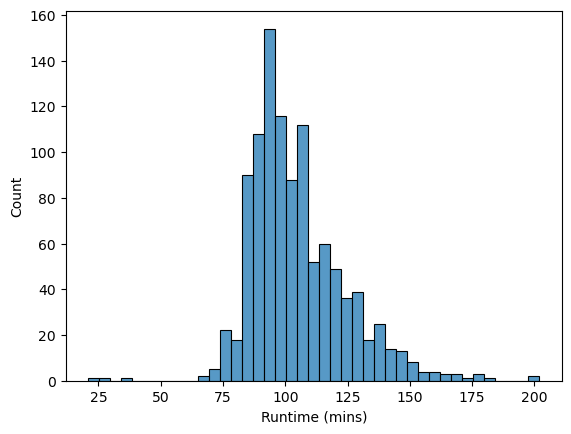

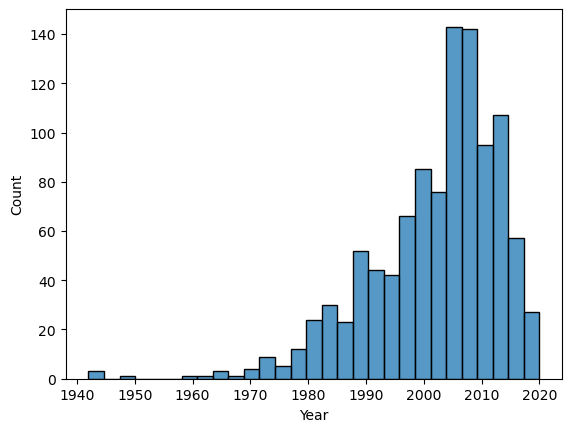

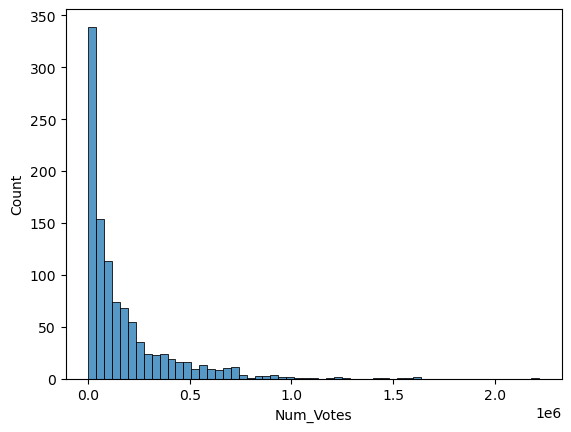

In [14]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(x=df[i])
        plt.show();

### KDE PLOT

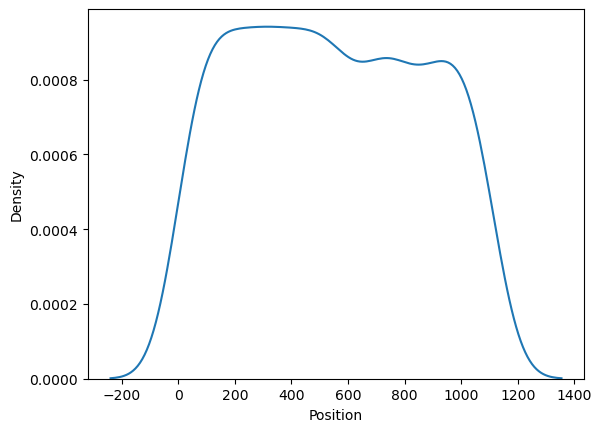

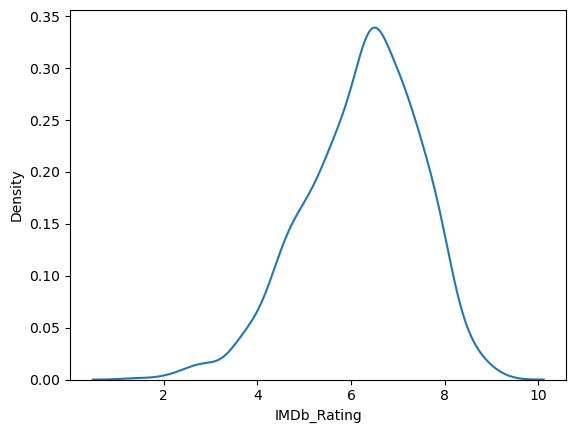

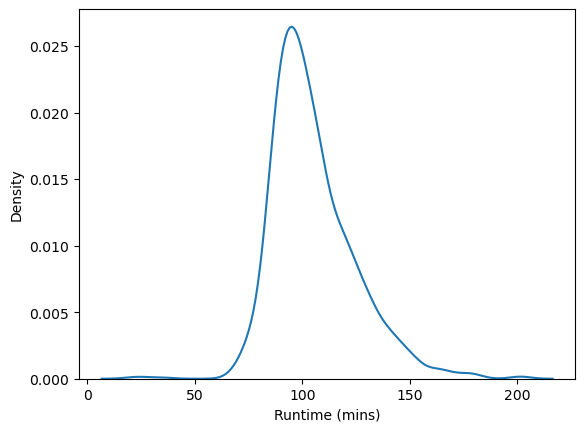

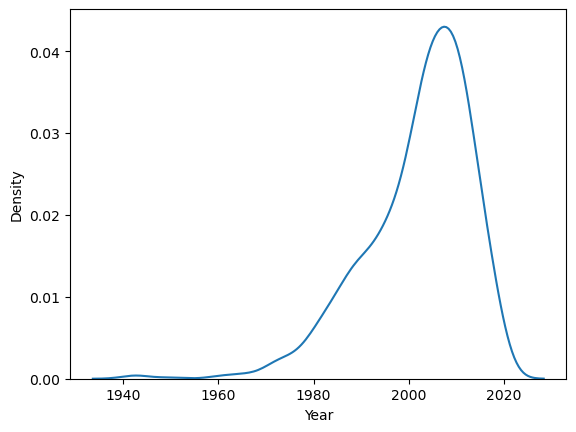

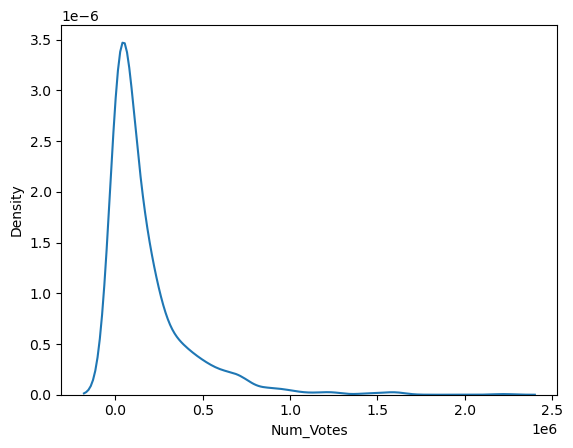

In [15]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.kdeplot(x=df[i])
        plt.show();

### COUNT PLOT

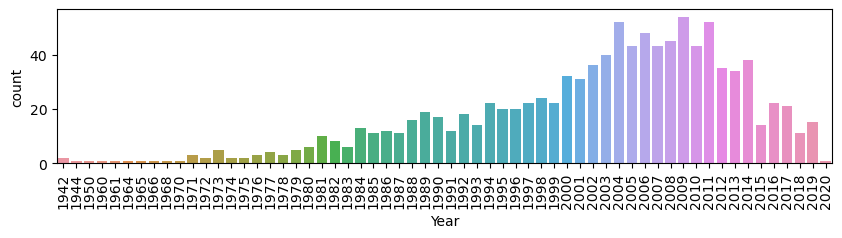

In [16]:
plt.figure(figsize=(10,2))
plt.xticks(rotation=90)
sns.countplot('Year',data=df)
plt.show()

### BOXPLOT

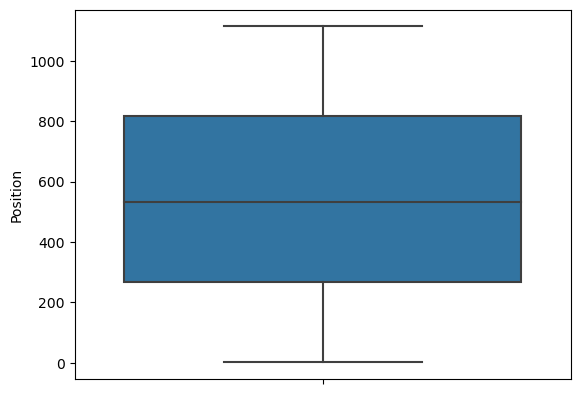

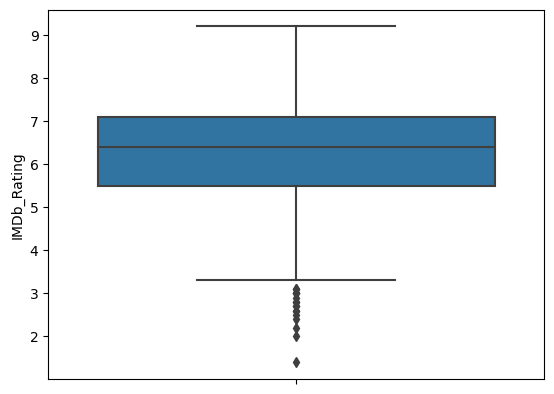

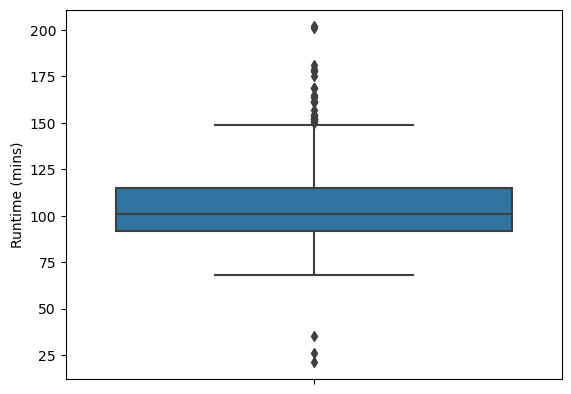

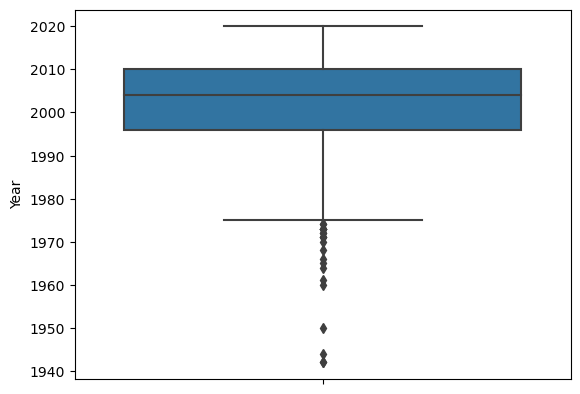

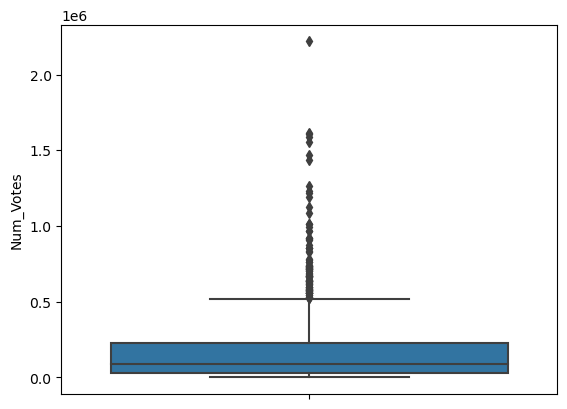

In [17]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

## MULTIVARIATE ANALYSIS

### BARPLOT

<AxesSubplot:title={'center':'Year vs IMDb_Rating'}, xlabel='Year', ylabel='IMDb_Rating'>

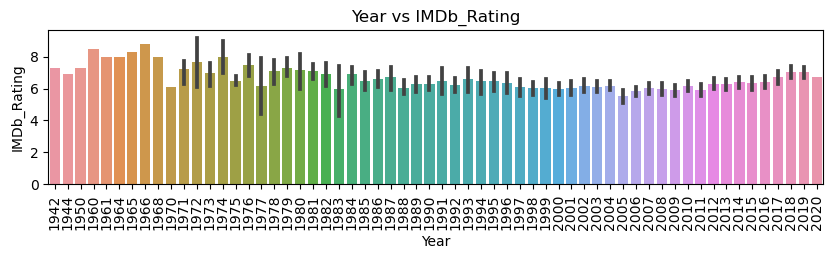

In [18]:
plt.figure(figsize=(10,2))
plt.title('Year vs IMDb_Rating')
plt.xticks(rotation=90)
sns.barplot(x='Year', y='IMDb_Rating', data=df)

### LINE PLOT

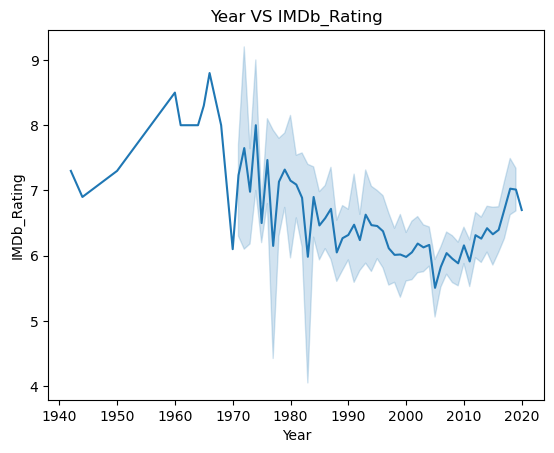

In [19]:
sns.lineplot('Year','IMDb_Rating',data=df)
plt.title('Year VS IMDb_Rating')
plt.show();

### PAIRPLOT

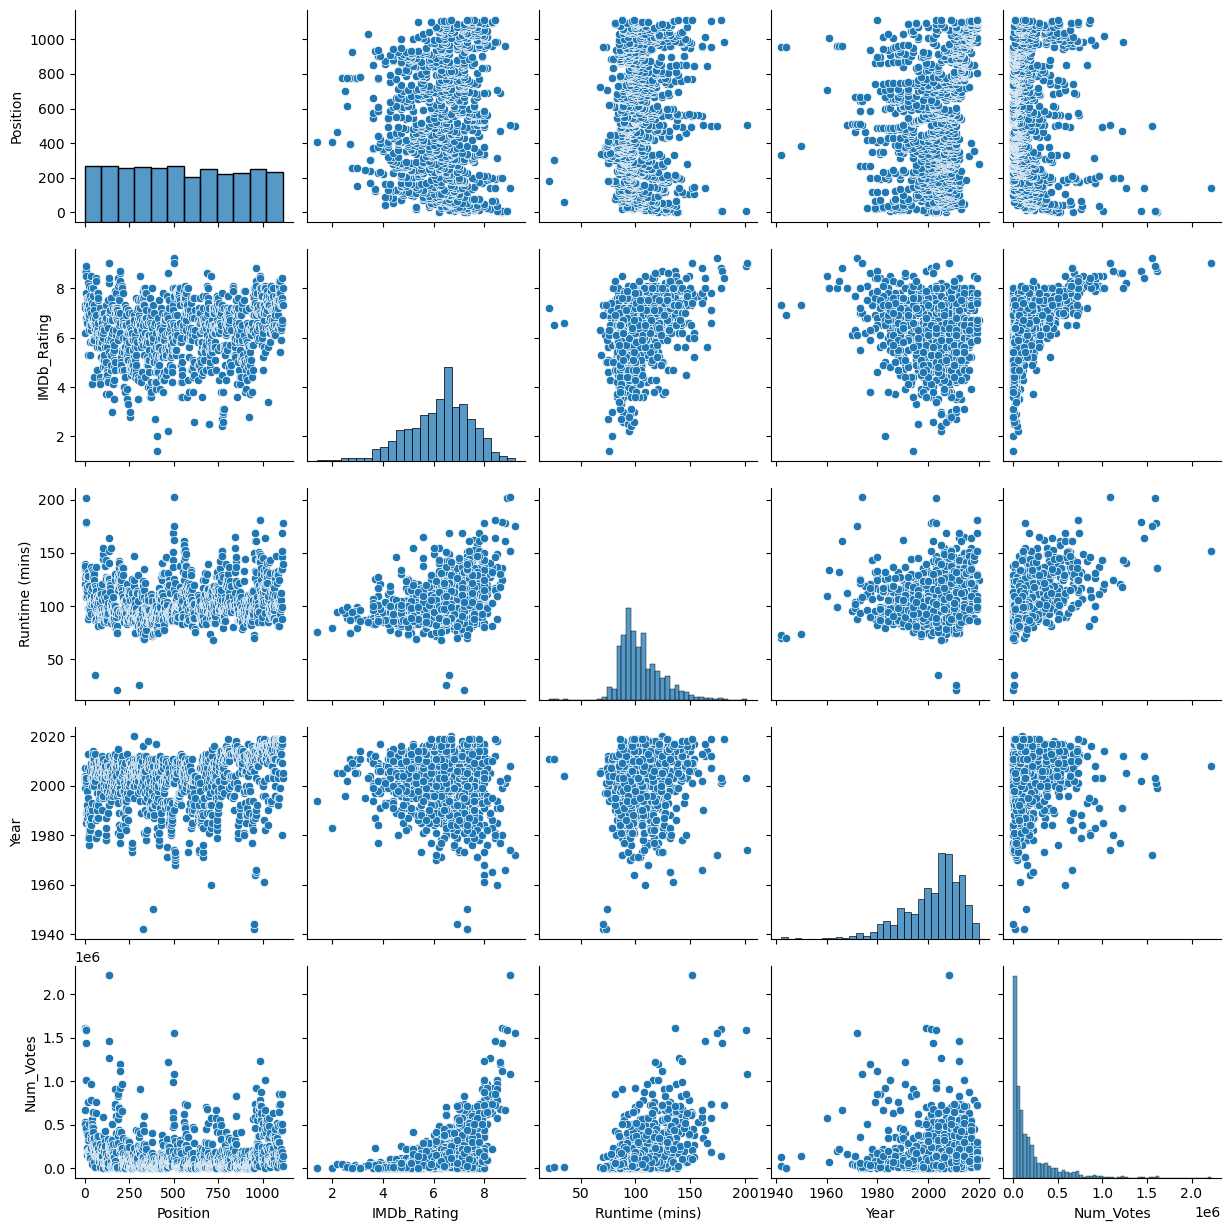

In [20]:
sns.pairplot(df)

### DESCRIPTIVE EDA 

In [21]:
df_2019 =df[df['Year']==2000]

In [22]:
df_2019.shape    

(32, 9)

## OUTLIER TREATMENT

In [23]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [24]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

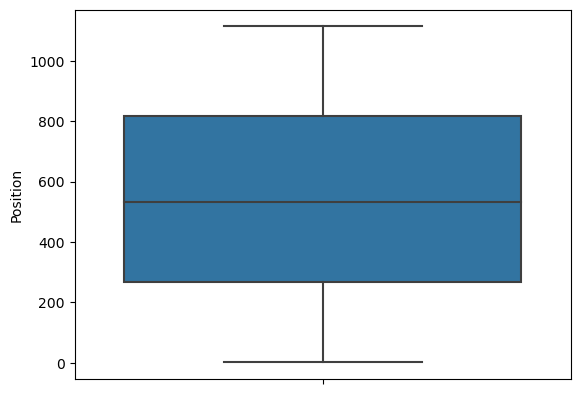

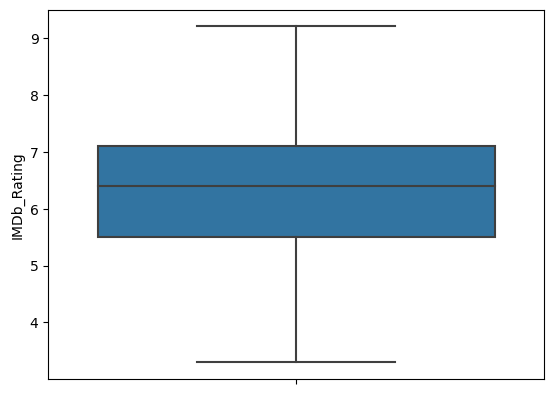

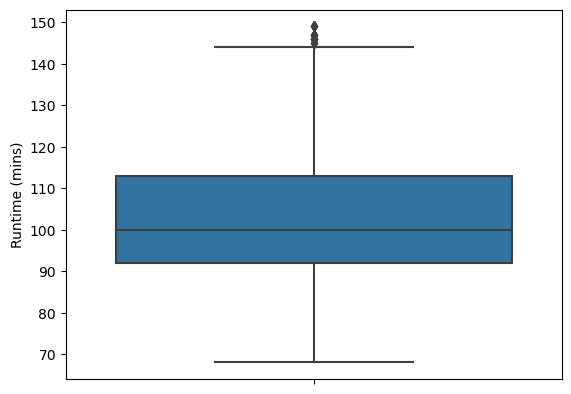

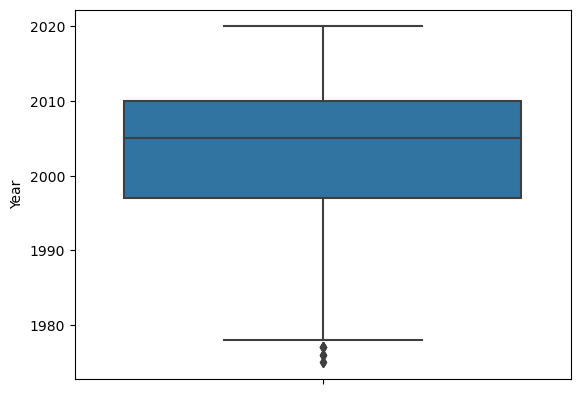

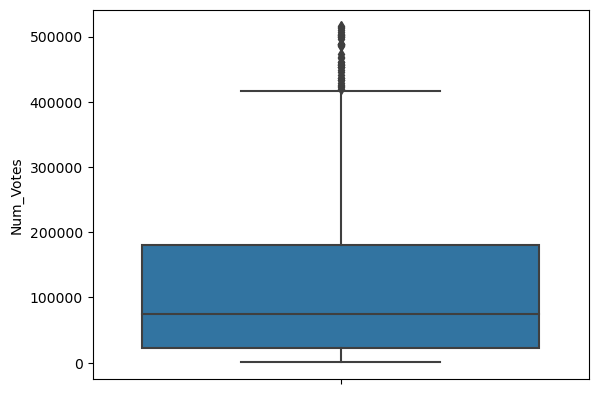

In [25]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

In [26]:
df.dropna(inplace=True)

## LABEL ENCODING REQUIRED COLUMNS

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 2 to 1073
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Position        913 non-null    float64
 1   Title           913 non-null    object 
 2   Title_Type      913 non-null    object 
 3   IMDb_Rating     913 non-null    float64
 4   Runtime (mins)  913 non-null    float64
 5   Year            913 non-null    float64
 6   Genres          913 non-null    object 
 7   Num_Votes       913 non-null    float64
 8   Directors       913 non-null    object 
dtypes: float64(5), object(4)
memory usage: 71.3+ KB


In [28]:
le=LabelEncoder()

In [29]:
col=['Title','Title_Type','Genres','Directors']
df[col]=df[col].apply(le.fit_transform)

## CHECKING CORRELATION USING HEATMAP

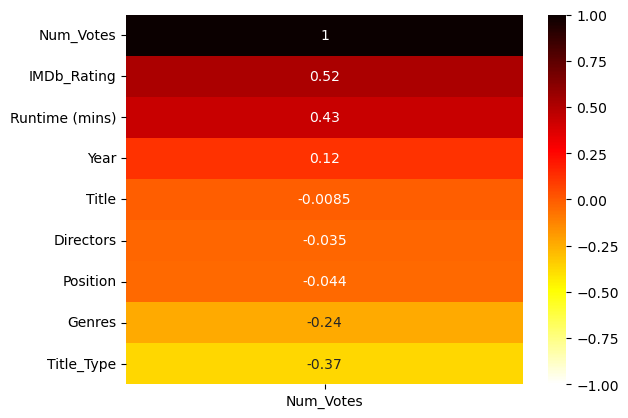

In [30]:
sns.heatmap(df.corr()[['Num_Votes']].sort_values(by='Num_Votes',ascending=False),vmin=-1,vmax=1,annot=True,cmap="hot_r");

## SELECTING X AND Y

In [31]:
x=df[['IMDb_Rating','Year','Runtime (mins)']].values
y=df[['Num_Votes']].values

## SCALING

In [32]:
sc = StandardScaler()
x=sc.fit_transform(x)

## CROSS VALIDATION

In [33]:
models={
'LinearRegression':LinearRegression(),
"Ridge":Ridge(),
"LinearSVR":LinearSVR(),
"DecisionTreeRegressor":DecisionTreeRegressor(),
"GradientBoostingRegressor":GradientBoostingRegressor(),
"AdaBoostRegressor":AdaBoostRegressor(),
"RandomForestRegressor":RandomForestRegressor()
}


In [34]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  101091.68028558447
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  101089.82012731432
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  168713.28447748537
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  137417.66579456453
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  102206.17322376328
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  104579.69597708936
******************************************

## WE MAY PROCEED WITH RandomForestRegressor

In [35]:
model=RandomForestRegressor()

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
model.fit(x_train,y_train)
print('model trained with {}'.format(model))
training_score=model.score(x_train,y_train)*100
testing_score=model.score(x_test,y_test)*100
score=r2_score(y_test,model.predict(x_test))*100
mae=mean_absolute_error(y_test,model.predict(x_test))
mse=mean_squared_error(y_test,model.predict(x_test))
rmse=np.sqrt(mse)
y_pred = model.predict(x)
print("r2score:",score)
print('training_score:',training_score)
print('testing_score:',testing_score)
print('mae:',mae)
print('mse:',mse)
print("rmse_test:",rmse)

model trained with RandomForestRegressor()
r2score: 36.11263394320833
training_score: 90.41584777183435
testing_score: 36.11263394320833
mae: 67470.38814806142
mse: 9179204830.267513
rmse_test: 95808.16682448065


## PREDICTING Y

In [38]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,485814.0,362487.34
1,502256.0,414530.98
2,436223.0,329440.39
3,460788.0,410785.80
4,388419.0,304038.82


## SCATTER PLOT

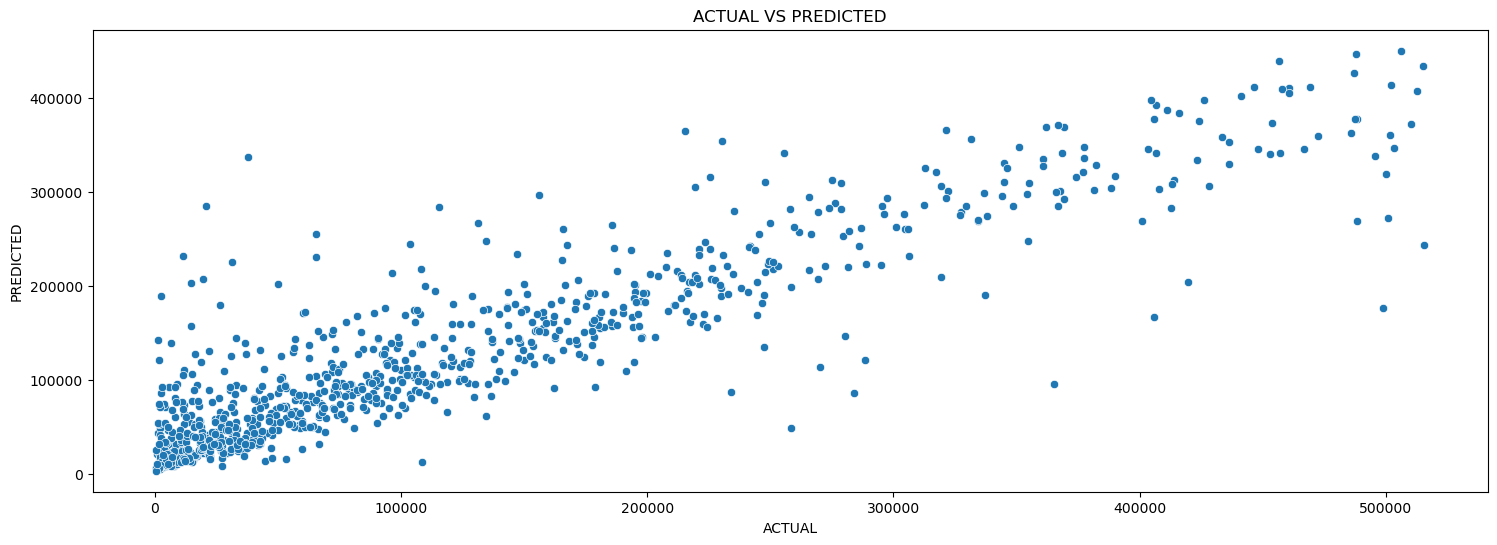

In [39]:
plt.figure(figsize=(18,6))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");